In [111]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [112]:
file_url = 'https://raw.githubusercontent.com/cs109/content/master/imdb_top_10000.txt'
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv(file_url, delimiter='\t', names=names).dropna()
# string interpolation with %i
print "Number of rows: %i" % data.shape[0]
data.head()  # print the first 5 rows

Number of rows: 9999


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


In [113]:
dirty = '142 mins.'
number, text = dirty.split(' ')
clean = int(number)
print number

142


In [114]:
clean_runtime = [float(r.split(' ')[0]) for r in data.runtime]
data['runtime'] = clean_runtime
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


In [115]:
#determine the unique genres
genres = set()
for m in data.genres:
    # split each genre field row by row, add to set if it doesn't exist already (set.update does this for us)
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

#make a column for each genre
for genre in genres: #column wise
    data[genre] = [genre in movie.split('|') for movie in data.genres] #row wise, one time for each row of data.genres
    # 'genre in movie.split('|')' is an equality test, returns true into that field if the original genre string in that row contains the genre(also the column header)

print type(data.genres)    
# pandas 'series' type must have some row wise field iteration stuff
data.head()

<class 'pandas.core.series.Series'>


,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


In [116]:
data['title'] = [t[0:-7] for t in data.title]
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


In [117]:
data[['score', 'runtime', 'year', 'votes']].describe()

,score,runtime,year,votes
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,6.385989,103.580358,1993.471447,16605.462946
std,1.189965,26.629310,14.830049,34564.883945
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2334.500000
50%,6.600000,102.000000,1998.000000,4981.000000
75%,7.200000,115.000000,2005.000000,15278.500000
max,9.200000,450.000000,2011.000000,619479.000000


In [118]:
#hmmm, a runtime of 0 looks suspicious. How many movies have that?
print len(data[data.runtime == 0])

#probably best to flag those bad data as NAN
data.runtime[data.runtime==0] = np.nan

282


/Users/corey/.virtualenvs/GA/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [119]:
data.runtime.describe()

count    9717.000000
mean      106.586395
std        20.230330
min        45.000000
25%        93.000000
50%       103.000000
75%       115.000000
max       450.000000
Name: runtime, dtype: float64

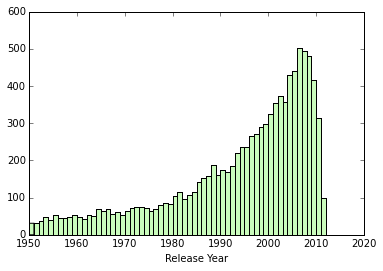

In [120]:
# more movies in recent years, but not *very* recent movies (they haven't had time to receive lots of votes yet?)
plt.hist(data.year, bins=np.arange(1950, 2013), color='#cafcbc')
plt.xlabel("Release Year")


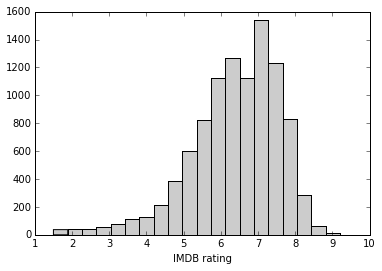

In [121]:
plt.hist(data.score, bins=20, color='#cccccc')
plt.xlabel("IMDB rating")

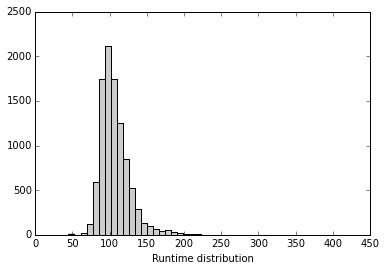

In [122]:
plt.hist(data.runtime.dropna(), bins=50, color='#cccccc')
plt.xlabel("Runtime distribution")

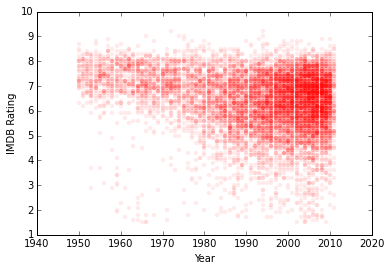

In [123]:
#hmm, more bad, recent movies. Real, or a selection bias?

plt.scatter(data.year, data.score, lw=0, alpha=.08, color='r')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")

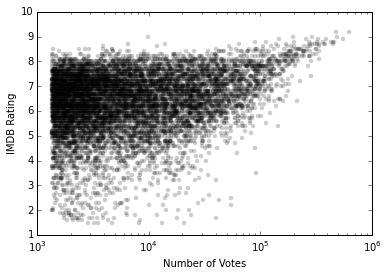

In [124]:
plt.scatter(data.votes, data.score, lw=0, alpha=.2, color='k')
plt.xlabel("Number of Votes")
plt.ylabel("IMDB Rating")
plt.xscale('log')

In [125]:
# low-score movies with lots of votes
data[(data.votes > 9e4) & (data.score < 5)][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
317,New Moon,2009,4.5,90457,Adventure|Drama|Fantasy|Romance
334,Batman & Robin,1997,3.5,91875,Action|Crime|Fantasy|Sci-Fi


In [126]:
# The lowest rated movies
data[data.score == data.score.min()][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
1982,Manos: The Hands of Fate,1966,1.5,20927,Horror
2793,Superbabies: Baby Geniuses 2,2004,1.5,13196,Comedy|Family
3746,Daniel the Wizard,2004,1.5,8271,Comedy|Crime|Family|Fantasy|Horror
5158,Ben & Arthur,2002,1.5,4675,Drama|Romance
5993,Night Train to Mundo Fine,1966,1.5,3542,Action|Adventure|Crime|War
6257,Monster a-Go Go,1965,1.5,3255,Sci-Fi|Horror
6726,Dream Well,2009,1.5,2848,Comedy|Romance|Sport


In [127]:
# The highest rated movies
data[data.score == data.score.max()][['title', 'year', 'score', 'votes', 'genres']]
data['weighted_score'] = data.score * data.votes


In [128]:
#sum sums over rows by default
genre_count = np.sort(data[genres].sum())[::-1]
pd.DataFrame({'Genre Count': genre_count})

,Genre Count
0,5697
1,3922
2,2832
3,2441
4,1891
5,1867
6,1313
7,1215
8,1009
9,916


In [129]:
#axis=1 sums over columns instead
genre_count = data[genres].sum(axis=1) 
print "Average movie has %0.2f genres" % genre_count.mean()
genre_count.describe()

Average movie has 2.75 genres


count    9999.000000
mean        2.753975
std         1.168910
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64

In [130]:
decade =  (data.year // 10) * 10

tyd = data[['title', 'year']]
tyd['decade'] = decade
print decade.head()
#print decade.shape()
print tyd.head()

0    1990
1    1990
2    1990
3    1990
4    2010
Name: year, dtype: int64
                      title  year  decade
0  The Shawshank Redemption  1994    1990
1              Pulp Fiction  1994    1990
2                Fight Club  1999    1990
3                The Matrix  1999    1990
4                 Inception  2010    2010


/Users/corey/.virtualenvs/GA/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


year
1950    7.244522
1960    7.062367
1970    6.842297
1980    6.248693
1990    6.199316
2000    6.277858
2010    6.344552
Name: Decade Mean, dtype: float64
year
1950    8.9
1960    9.0
1970    9.2
1980    8.8
1990    9.2
2000    8.9
2010    8.9
Name: Decade Max, dtype: float64


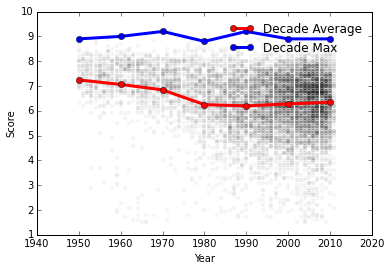

In [131]:
#mean score for all movies in each decade
decade_mean = data.groupby(decade).score.mean()
decade_max = data.groupby(decade).score.max()
decade_mean.name = 'Decade Mean'
decade_max.name = 'Decade Max'
print decade_mean
print decade_max

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')

plt.plot(decade_max.index, decade_max.values, 'o-',
        color='b', lw=3, label='Decade Max')
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.plot
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)


Mean
year
1950    7.244522
1960    7.062367
1970    6.842297
1980    6.248693
1990    6.199316
2000    6.277858
2010    6.344552
Name: score, dtype: float64
standard deviation:
year
1950    0.960821
1960    1.138116
1970    1.042653
1980    1.209963
1990    1.171295
2000    1.161393
2010    1.153025
Name: score, dtype: float64


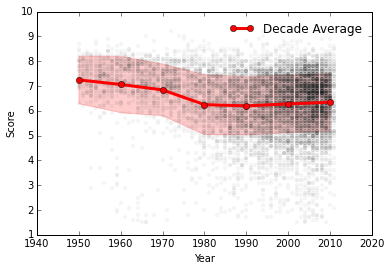

In [132]:
grouped_scores = data.groupby(decade).score

mean = grouped_scores.mean()
std = grouped_scores.std()
print "Mean"
print mean
print "standard deviation:"
print std
plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.fill_between(decade_mean.index, (decade_mean + std).values,
                 (decade_mean - std).values, color='r', alpha=.2)
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)


In [133]:
for year, subset in data.groupby('year'):
    print year, subset[subset.score == subset.score.max()].title.values
    

1950 ['Sunset Blvd.']
1951 ['Strangers on a Train']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique']
1956 ['The Killing']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963 ['The Great Escape' 'High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ['For a Few Dollars More']
1966 ['The Good, the Bad and the Ugly']
1967 ['Cool Hand Luke']
1968 ['Once Upon a Time in the West']
1969 ['Butch Cassidy and the Sundance Kid' 'Army of Shadows']
1970 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971 ['A Clockwork Orange']
1972 ['The Godfather']
1973 ['The Sting' 'Scenes from a Marriage']
1974 ['The Godfather: Part II']
1975 ['Outrageous Class']
1976 ['Tosun Pasa']
1977 ['Star Wars: Episode IV - A New Hope']
1978 ['The Girl with the Red Scarf']
1979 ['Apocalypse Now']
1980 ['Star Wars: 

# Some plots: 
### 1. What time periods are people voting on most? 

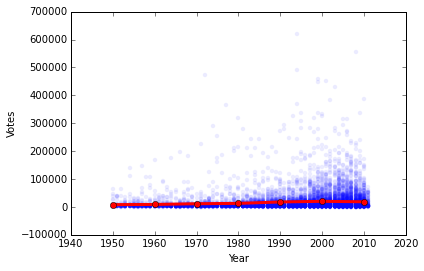

In [134]:
votes_mean = data.groupby(decade).votes.mean()
votes_mean.name = 'Votes Mean'

plt.plot(votes_mean.index, votes_mean.values, 'o-',
        color='r', lw=3, label='Decade Votes Average')

plt.scatter(data.year, data.votes, lw=0, alpha=.08, color='b')
plt.plot
plt.xlabel("Year")
plt.ylabel("Votes")
#plt.yscale('log')

### 2. Do long movies get rated higher? 

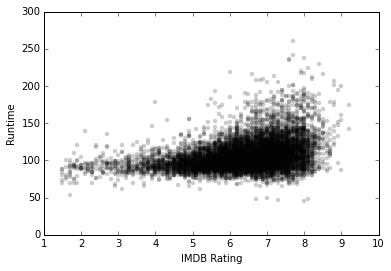

In [135]:
#trim out the high runtime outliers to make the plot a little more meaningful
tdata = data[data.runtime < 400]

plt.scatter(tdata.score,tdata.runtime, lw=0, alpha=.2, color='k')
plt.xlabel("IMDB Rating")
plt.ylabel("Runtime")

#A couple interesting facts

In [136]:
# score feels more relevant when it's weighted by the number of votes. 

# top scoring movies weighted by number of votes
data['weighted_score'] = data.score * data.votes
data[['title', 'year', 'weighted_score', 'score', 'votes', 'genres']].sort('weighted_score', ascending = False).head()

,title,year,weighted_score,score,votes,genres
0,The Shawshank Redemption,1994,5699206.8,9.2,619479,Crime|Drama
25,The Dark Knight,2008,4940585.8,8.9,555122,Action|Crime|Drama|Thriller
1,Pulp Fiction,1994,4410585.0,9.0,490065,Crime|Thriller
26,The Godfather,1972,4362538.8,9.2,474189,Crime|Drama
2,Fight Club,1999,4031922.4,8.8,458173,Drama|Mystery|Thriller


count      9999.000000
mean      16605.462946
std       34564.883945
min        1356.000000
25%        2334.500000
50%        4981.000000
75%       15278.500000
max      619479.000000
Name: votes, dtype: float64


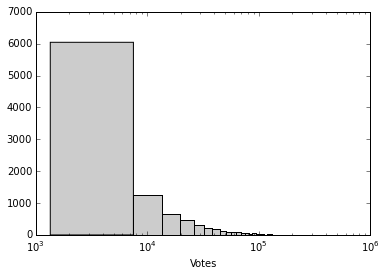

In [137]:
# low scoring, heavily voted movies also feel more relevant though - people may have emphatically hated those. 
# what does 'heavily voted' mean? Let's look at a histogram of vote counts. 

print data.votes.describe()
plt.hist(data.votes, bins=100, color='#cccccc')
plt.xlabel("Votes")
plt.xscale('log')

In [138]:
# most movies get less than 100,000 votes
data['votes'][data['votes'] > 100000].count()

272

In [139]:
# so let's look at the lowest score movies with vote counts over 100,000
data[['title', 'year', 'weighted_score', 'score', 'votes', 'genres']][data['votes'] > 100000].sort('score', ascending = True).head()

,title,year,weighted_score,score,votes,genres
146,Twilight,2008,779544.0,5.4,144360,Adventure|Drama|Fantasy|Romance
211,Pearl Harbor,2001,619294.5,5.5,112599,Action|Drama|Romance|War
256,2012,2009,590567.6,5.8,101822,Action|Adventure|Drama|Sci-Fi|Thriller
172,Transformers: Revenge of the Fallen,2009,720124.5,5.9,122055,Action|Adventure|Sci-Fi|Thriller
278,Ocean's Twelve,2004,634412.2,6.1,104002,Crime|Thriller
